# Cells in a cylindrical geometry

This demo shows cell arangement in a cylindrical geometry. The representation deals with cells in 
the x-y  plane at a given z slice. 

Import modules and load parfis lib

In [1]:
import parfis as pfs
from parfis import Parfis
import matplotlib.pyplot as plt

Parfis.load_lib()

Successfully loaded lib file: libparfis64.so


Create simulation data

In [2]:
id = Parfis.newParfis()
Parfis.loadCfgData(id)
Parfis.loadSimData(id)
Parfis.runCommandChain(id, "create")

0

Get pointers to simulation data

In [3]:
Parfis.setPyCfgData(id)
ptrCfgData = Parfis.getPyCfgData(id)
Parfis.setPySimData(id)
ptrSimData = Parfis.getPySimData(id)

Get geometry and cell measures

In [4]:
cellSize = ptrCfgData[0].cellSize[0]
geoSize = ptrCfgData[0].geometrySize[0]
cellCount = ptrCfgData[0].cellCount[0]
print(f"cellSize = {cellSize} meters")
print(f"geoSize = {geoSize} meters")
print(f"cellCount = {cellCount}")

cellSize = {x: 0.001, y: 0.001, z: 0.001} meters
geoSize = {x: 0.02, y: 0.02, z: 0.4} meters
cellCount = {x: 20, y: 20, z: 400}


Get all cell absolute id that lie in the x-y plane at z=10 and print the first few of them. Every
absolute id by value is `Const.noCellId` or a certain id that corresponds to the position in
the vector of existing cells. We gather two vectors, one with absolute cell ids and one with
real cell ids.

Absolute id values $A_{id}$ are mapped according to the following formula:

$$
A_{id} = C_z C_y x + C_z y + z
$$

In [5]:
cellPos = pfs.Vec3DClass(pfs.Type.cellPos_t)(z=10)
absCellId = []
realCellId = []
for i in range(cellCount.x):
    cellPos.x = i
    for j in range(cellCount.y):
        cellPos.y = j
        absCellId.append(pfs.getAbsoluteCellId(cellCount, cellPos))
        realCellId.append(ptrSimData[0].cellIdVec.ptr[absCellId[-1]])
        cellPosFromData = None
        if realCellId[-1] != 0xffffffff:
            cellPosFromData = ptrSimData[0].cellVec.ptr[realCellId[-1]].pos
        if i==0 and j < 10:
            print(f"{cellPos} -> {absCellId[-1]} -> {realCellId[-1]} -> {cellPosFromData}")

{x: 0, y: 0, z: 10} -> 10 -> 4294967295 -> None
{x: 0, y: 1, z: 10} -> 410 -> 4294967295 -> None
{x: 0, y: 2, z: 10} -> 810 -> 4294967295 -> None
{x: 0, y: 3, z: 10} -> 1210 -> 4294967295 -> None
{x: 0, y: 4, z: 10} -> 1610 -> 4294967295 -> None
{x: 0, y: 5, z: 10} -> 2010 -> 10 -> {x: 0, y: 5, z: 10}
{x: 0, y: 6, z: 10} -> 2410 -> 410 -> {x: 0, y: 6, z: 10}
{x: 0, y: 7, z: 10} -> 2810 -> 810 -> {x: 0, y: 7, z: 10}
{x: 0, y: 8, z: 10} -> 3210 -> 1210 -> {x: 0, y: 8, z: 10}
{x: 0, y: 9, z: 10} -> 3610 -> 1610 -> {x: 0, y: 9, z: 10}


In [17]:
for cid in cellId:
    pfs.getCellFromCellId()

{x: 4, y: 1, z: 10}
{x: 0, y: 5, z: 0}
{x: 0, y: 5, z: 1}
{x: 0, y: 5, z: 2}
{x: 0, y: 6, z: 0}
{x: 0, y: 5, z: 399}
{x: 0, y: 6, z: 0}
{x: 0, y: 7, z: 0}
{x: 0, y: 7, z: 23}


AttributeError: module 'parfis' has no attribute 'getCellFromCellId'

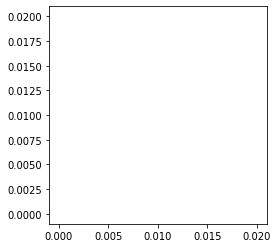

In [6]:
fig, ax = plt.subplots()
ax.plot()
ax.set_xlim(0 - cellSize.x, geoSize.x + cellSize.x)
ax.set_ylim(0 - cellSize.y, geoSize.y + cellSize.y)
ax.set_aspect('equal')
plt.show()

In [7]:

# unit_size = parfis.get_xyz_double("space.unit_cell_size")
#     geo_size = parfis.get_xyz_double("space.geometry_size")

#     cell_cnt_x = int(geo_size.x/unit_size.x)
#     cell_cnt_y = int(geo_size.y/unit_size.y)

Circle shows the geometry boundary.
Picture meaning:

- Light blue cells exist in the system
- Dark blue cells are completly inside the geometry (pin == 0xFF)
- Red colored nodes are inside the geometry